In [68]:
import sys
from pathlib import Path
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr


sys.path.append(str(Path("../../..").resolve()))

from src.constants import model_data_dir

In [69]:
pd.read_csv(model_data_dir / "train_regression.csv").drop(["sc_1d_fwd_rel_ret", "mom_1d_fwd_rel_ret"], axis=1)

,Date,VIX,V2X,MSCI EM Vol,MOVE,Oil Vol,Gold Vol,HY Vol,JPM Global FX Vol,JPM G7 FX Vol,...,CAD/USD Carry,AUD/USD Carry,NZD/USD Carry,CHF/USD Carry,Copper 1 year carry,month,year,day,weekday,value_1d_fwd_rel_ret
0,2000-05-31,0.0046,-0.0698,-0.0387,-0.0994,-0.0387,-0.0387,-0.0387,-0.0325,-0.0387,...,-0.0151,0.0099,0.0039,-0.0208,-0.0160,-0.3402,-5.1993,5.1993,-0.0113,0.004223
1,2000-06-01,-0.1919,-0.2857,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,-0.0423,-0.0515,...,-0.0057,0.0030,0.0014,0.0187,0.0022,-0.1182,-5.1993,-5.1993,0.5207,-0.003080
2,2000-06-02,-0.1715,-0.4861,0.0110,-0.1309,0.0110,0.0110,0.0110,0.0042,0.0110,...,-0.0499,-0.0325,-0.0305,-0.0526,-0.0391,-0.1182,-5.1993,-1.6793,5.1993,0.004965
3,2000-06-05,0.3060,0.5006,0.0387,-0.1097,0.0387,0.0387,0.0387,-0.0369,-0.0384,...,0.0094,-0.0163,-0.0059,-0.0036,-0.0048,-0.1182,-5.1993,-1.0707,-5.1993,-0.005362
4,2000-06-06,0.0485,0.3045,0.0776,0.1764,0.0776,0.0776,0.0776,0.0776,0.1012,...,-0.0083,-0.0443,-0.0085,-0.0209,-0.0102,-0.1182,-5.1993,-0.9339,-0.5525,-0.000852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2013-12-24,0.2288,0.0220,0.3231,-0.1430,1.1523,-0.1272,0.0220,0.0556,0.0441,...,-0.0193,-0.0096,-0.0196,-0.0273,0.0079,5.1993,0.3071,0.7530,-0.5525,0.000231
3414,2013-12-26,0.0582,-0.0793,-0.4128,0.1012,-0.5029,-0.1257,-0.0793,-0.1627,-0.1354,...,-0.0152,-0.0156,-0.0135,-0.0116,0.0301,5.1993,0.3071,0.9836,0.5207,0.000176
3415,2013-12-27,-0.0472,8.3522,0.2150,0.0937,-0.1210,-0.5333,-0.1355,-0.1551,-0.1110,...,-0.0441,-0.0094,-0.0114,0.0731,0.1321,5.1993,0.3071,1.1258,5.1993,0.000158
3416,2013-12-30,-0.3449,-0.1833,-0.5017,-0.2766,-0.1032,0.2958,-0.2300,-0.0197,-0.0421,...,0.0458,0.0157,0.0515,0.0357,-0.2755,5.1993,0.3071,1.8180,-5.1993,0.000588


In [70]:
df_train = pd.read_csv(model_data_dir / "train_regression.csv").drop(["sc_1d_fwd_rel_ret", "mom_1d_fwd_rel_ret", "year", "month", "day", "weekday"], axis=1)

dates = df_train.pop("Date")

In [71]:
df_train

,VIX,V2X,MSCI EM Vol,MOVE,Oil Vol,Gold Vol,HY Vol,JPM Global FX Vol,JPM G7 FX Vol,JPM EM FX Vol,...,G10 Carry Trade Index,JPY/USD Carry,GBP/USD Carry,EUR/USD Carry,CAD/USD Carry,AUD/USD Carry,NZD/USD Carry,CHF/USD Carry,Copper 1 year carry,value_1d_fwd_rel_ret
0,0.0046,-0.0698,-0.0387,-0.0994,-0.0387,-0.0387,-0.0387,-0.0325,-0.0387,4.9321,...,0.1076,-0.0684,-0.0358,-0.0169,-0.0151,0.0099,0.0039,-0.0208,-0.0160,0.004223
1,-0.1919,-0.2857,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,-0.0423,-0.0515,0.9434,...,-0.0600,-0.0485,0.0565,0.0154,-0.0057,0.0030,0.0014,0.0187,0.0022,-0.003080
2,-0.1715,-0.4861,0.0110,-0.1309,0.0110,0.0110,0.0110,0.0042,0.0110,0.5356,...,-0.0456,0.0284,-0.1033,-0.0305,-0.0499,-0.0325,-0.0305,-0.0526,-0.0391,0.004965
3,0.3060,0.5006,0.0387,-0.1097,0.0387,0.0387,0.0387,-0.0369,-0.0384,0.3875,...,-0.0122,0.0349,-0.0760,-0.0031,0.0094,-0.0163,-0.0059,-0.0036,-0.0048,-0.005362
4,0.0485,0.3045,0.0776,0.1764,0.0776,0.0776,0.0776,0.0776,0.1012,-0.1675,...,0.1547,0.1102,-0.0531,-0.0120,-0.0083,-0.0443,-0.0085,-0.0209,-0.0102,-0.000852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0.2288,0.0220,0.3231,-0.1430,1.1523,-0.1272,0.0220,0.0556,0.0441,0.0000,...,0.0218,0.0485,0.0104,-0.0176,-0.0193,-0.0096,-0.0196,-0.0273,0.0079,0.000231
3414,0.0582,-0.0793,-0.4128,0.1012,-0.5029,-0.1257,-0.0793,-0.1627,-0.1354,-0.0329,...,-0.0284,0.2131,0.0237,0.0098,-0.0152,-0.0156,-0.0135,-0.0116,0.0301,0.000176
3415,-0.0472,8.3522,0.2150,0.0937,-0.1210,-0.5333,-0.1355,-0.1551,-0.1110,-0.3735,...,-0.0484,0.1119,0.0348,0.0584,-0.0441,-0.0094,-0.0114,0.0731,0.1321,0.000158
3416,-0.3449,-0.1833,-0.5017,-0.2766,-0.1032,0.2958,-0.2300,-0.0197,-0.0421,0.0206,...,0.1098,-0.0035,0.0113,0.0549,0.0458,0.0157,0.0515,0.0357,-0.2755,0.000588


## Explore ACF

In [72]:
auto_cor = [{"lag": lag, "corr": df_train["value_1d_fwd_rel_ret"].autocorr(lag)} for lag in range(1, 90)]
pd.DataFrame(auto_cor).sort_values("corr", ascending=False).head()

,lag,corr
19,20,0.056040
21,22,0.053327
12,13,0.051467
2,3,0.051342
15,16,0.046260


In [73]:
def cross_corr(df, target, col, lag):
    if col not in ["Date", "value_1d_fwd_rel_ret"]:
        try:
            return pearsonr(df[target][lag:], df[col].shift(lag)[lag:])[0]
        except:
            return np.nan
    
    return np.nan
            
def cross_corrs(df = df_train, target = "value_1d_fwd_rel_ret", lag = 1):
    corr_dict= {}
    for col in df.columns.tolist():
        corr_dict[col] = cross_corr(df, target, col, lag)
    return corr_dict

In [74]:
corrs = pd.DataFrame([cross_corrs(df_train, "value_1d_fwd_rel_ret", lag) 
                            for lag in range(1, 91)])
corrs

,VIX,V2X,MSCI EM Vol,MOVE,Oil Vol,Gold Vol,HY Vol,JPM Global FX Vol,JPM G7 FX Vol,JPM EM FX Vol,...,G10 Carry Trade Index,JPY/USD Carry,GBP/USD Carry,EUR/USD Carry,CAD/USD Carry,AUD/USD Carry,NZD/USD Carry,CHF/USD Carry,Copper 1 year carry,value_1d_fwd_rel_ret
0,0.001291,-0.021965,0.003848,0.005580,-0.007067,0.011498,0.004573,0.008285,0.015308,0.017075,...,0.011843,-0.014454,-0.027697,-0.007516,0.026074,0.000546,-0.002889,-0.008411,0.008693,NaN
1,0.026912,-0.057475,-0.005057,-0.014341,0.004522,0.006943,0.007401,-0.013650,0.011201,0.010467,...,0.007006,-0.011802,-0.017582,-0.033786,0.002753,-0.002031,0.003113,0.001717,-0.012192,NaN
2,-0.013364,-0.060929,0.007964,-0.004097,0.007634,-0.007660,0.007485,0.001022,-0.023867,0.005429,...,0.009544,-0.016880,-0.011873,-0.000502,-0.063126,-0.001339,-0.016505,-0.025103,-0.008604,NaN
3,-0.003844,-0.075286,-0.011586,-0.009659,-0.005552,-0.006468,-0.020037,0.003310,-0.017755,-0.012316,...,0.013391,0.003729,0.014504,0.005348,0.044722,-0.028425,0.006411,0.000146,-0.002739,NaN
4,-0.013332,0.023326,-0.031867,-0.001279,-0.003391,-0.021114,0.007068,-0.008547,0.022034,0.035122,...,-0.002279,0.002649,-0.001652,0.016813,-0.025063,-0.011101,0.027883,0.000038,-0.007700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.006767,-0.032299,0.018548,0.003519,-0.007374,-0.009007,-0.021729,-0.019618,-0.010426,0.004834,...,0.003402,0.006719,-0.014532,0.002052,0.021876,-0.004674,-0.026599,0.022463,0.018370,NaN
86,0.001893,-0.014008,-0.014387,0.002640,0.006609,-0.009239,0.010326,-0.003596,0.028652,0.033832,...,-0.006695,-0.019860,0.001544,-0.007954,-0.017296,0.047369,-0.055501,-0.007087,0.006063,NaN
87,0.004968,0.004087,0.017086,0.025727,0.024407,-0.000075,0.027654,0.007741,0.005980,0.000948,...,-0.006374,-0.025104,0.019978,0.007715,0.037335,-0.009050,0.028954,0.005312,0.000498,NaN
88,-0.008090,-0.024234,0.020698,-0.033649,0.012514,0.008029,0.014940,0.002414,0.004824,0.024172,...,0.011381,0.006187,0.009689,0.004416,-0.014702,-0.008563,0.027579,0.008359,-0.003214,NaN


## Feature selection

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

y_train, x_train = df_train.pop("value_1d_fwd_rel_ret"), df_train

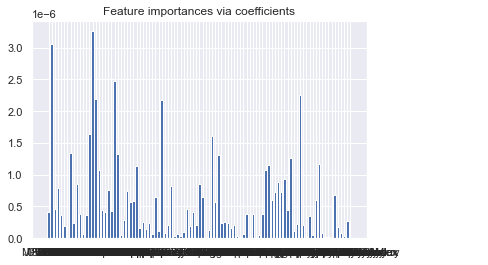

In [76]:
ridge_fit = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_train, y_train)
importance = np.abs(ridge_fit.coef_)
feature_names = np.array(x_train.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

### Sequential selection

In [77]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
sfs_forward = SequentialFeatureSelector(
    ridge_fit, n_features_to_select=15, direction="forward"
).fit(x_train, y_train)

In [78]:
feature_names[sfs_forward.get_support()]

array(['V2X', 'MSCI EM Vol', 'JPM Global FX Vol', 'JPM EM FX Vol',
       'S&P 500', 'MSCI EM', 'WTI Crude Oil', 'US 10Y over 3M',
       'GTGBP10YR Corp                                                  ',
       'Ted Spread', 'US 10Yr swap spread ', 'IWF', 'IWM',
       'CAD/USD Carry', 'CHF/USD Carry'], dtype=object)

### Feature selection based on importance

In [79]:
sfm = SelectFromModel(ridge_fit, threshold=np.sort(importance)[-15]).fit(x_train, y_train)
feature_names[sfm.get_support()]

array(['V2X', 'JPM Global FX Vol', 'S&P 500 VRP', 'S&P 500 Skew',
       'EURUSD Risk Reversal', 'WTI Crude Oil', 'S&P GSCI', 'CDX HY 5Yr',
       'US 10Y over 3M', 'EUR Libor', 'Fed Target Rate',
       'US 2Yr swap spread ', 'China Economic Activity Surprise', 'IWF',
       'USDJPY ATM Vol 1Y-3M'], dtype=object)

## Prophet

In [80]:
selected_vars

array(['MSCI EM Vol', 'HY Vol', 'JPM G7 FX Vol', 'S&P 500', 'CDX IG 5Yr',
       'CDX HY 5Yr',
       'USGG10YR Index                                                  ',
       'USD Libor', 'EU IG CDS spread', 'Min Vol Index', 'IWM',
       'MSCI USA Sector Neutral Quality Index                                                  ',
       'EUR/USD Carry', 'NZD/USD Carry', 'CHF/USD Carry'], dtype=object)

In [81]:
from fbprophet import Prophet
selected_vars = feature_names[sfs_forward.get_support()]
m = Prophet(growth = "linear", weekly_seasonality=True, yearly_seasonality=True)


In [82]:
df_train["Date"] = dates
df_train["value_1d_fwd_rel_ret"] = y_train
df_model = df_train.rename(columns={"Date": "ds", "value_1d_fwd_rel_ret": "y"})

In [83]:
m.fit(df_model)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.4682


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5463.68   6.67321e-05       55.1494      0.1511           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       5463.73   6.23907e-05       58.7268   7.567e-07       0.001      201  LS failed, Hessian reset 
     176       5463.73   2.61644e-06       46.1082   3.852e-08       0.001      308  LS failed, Hessian reset 
     182       5463.73   3.60668e-07       62.0399      0.4506      0.4506      315   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [84]:
df_test = pd.read_csv(model_data_dir / "test_regression.csv")[["Date", "value_1d_fwd_rel_ret"] + selected_vars.tolist()].rename({"Date": "ds"}, axis=1)


/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


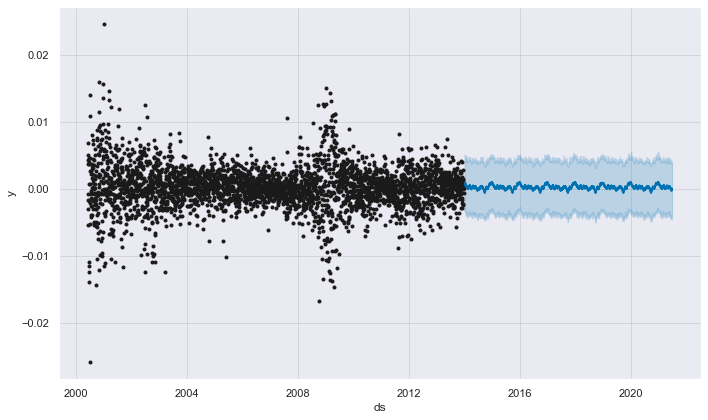

In [85]:
forecast = m.predict(df_test)
fig1 = m.plot(forecast)

<AxesSubplot:xlabel='ds', ylabel='price'>

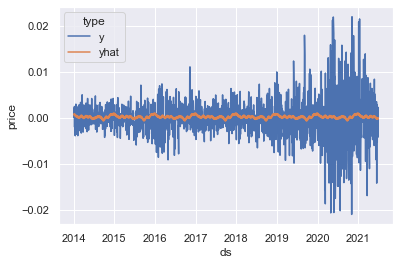

In [86]:
import seaborn as sns
sns.set_theme(style="darkgrid")

df_preds = forecast.assign(y = df_test["value_1d_fwd_rel_ret"])[["ds", "y", "yhat"]]
plot_data = df_preds.melt(id_vars="ds", var_name="type", value_name="price")

# Plot the responses for different events and regions
sns.lineplot(x="ds", y="price",
             hue="type",
             data=plot_data)

/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/qiushi/workspace/dsi-courses/APlusBernstein-Project/venv/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


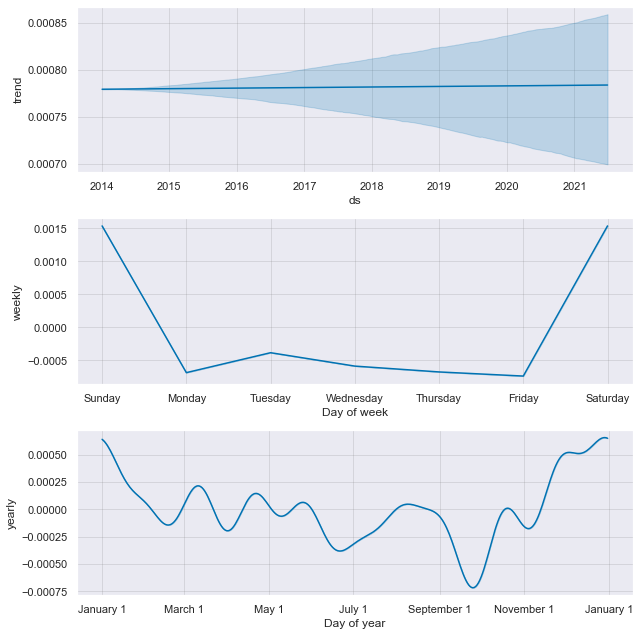

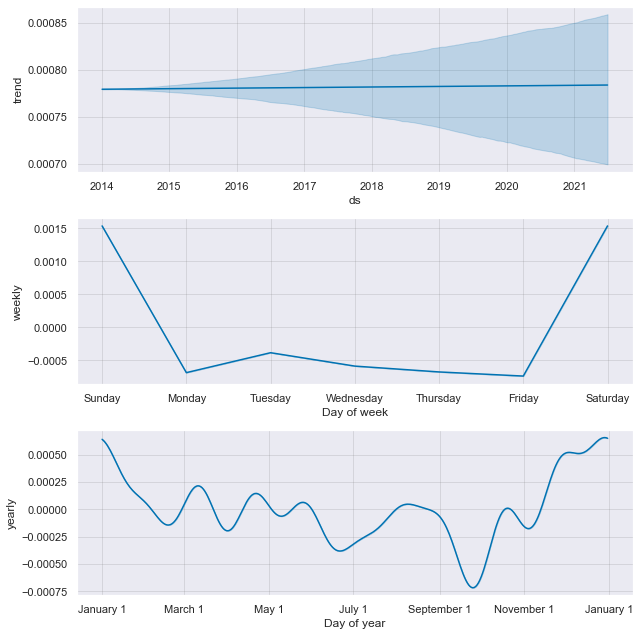

In [87]:
m.plot_components(forecast)

In [88]:
# mean absolute relative error
np.abs((df_preds["y"] - df_preds["yhat"])).mean()

0.0028299107324883475